In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import glob
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')
mpl.rcParams['savefig.dpi'] = 128
mpl.rcParams['figure.dpi'] = 128
# Plot size to 14" x 7"
mpl.rc('figure', figsize = (14, 7))
# Font size to 14
mpl.rc('font', size = 14)
# Do not display top and right frame lines
mpl.rc('axes.spines', top = False, right = False)
# Remove grid lines
mpl.rc('axes', grid = False)
# Set backgound color to white
mpl.rc('axes', facecolor = 'white')

In [2]:
# read whole year data
allFiles = glob.glob("data/*/*.csv")
df = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0,encoding="utf-8")
    list_.append(df)
df = pd.concat(list_)

In [3]:
df.drop_duplicates(inplace=True)

In [4]:
def transform_cols(df):
    df.columns = map(str.lower, df.columns)
    df.columns = df.columns.str.replace('_', ' ')
    return df

In [5]:
df = transform_cols(df)

In [6]:
df.groupby(['rejected reason']).size() \
    .reset_index(name="counts") \
    .sort_values(['counts'], ascending=False)

,rejected reason,counts
5,No start - Cannot contact,88546
13,No start - Not serious/Researching,48183
23,No start - Withdrawn from market,17962
24,No start - Wrong Number,13432
9,No start - Insufficient income,10908
8,No start - Insufficient deposit or savings,9696
2,No start - Can't dislodge lender,8762
10,No start - No lender match,6379
18,No start - Refinance NOT cost effective,3437
3,No start - Can't dislodge other broker,3210


In [7]:
# selected_features = ['marketing code','enquired',
#                      'loan amount','loan reason','property use']
# selected_features = ['marketing code','enquired',
#                      'loan amount','loan reason','property use']
selected_features = ['classification','enquired']
target = 'enquiry status';
whole_set = selected_features + [target]

df = df[whole_set]

In [8]:
df = df[~df[target].isin(['In Progress','Just Received','On Hold'])]
df.shape

(269530, 3)

In [9]:
def clearnLoanAmount(df): 
    invalid_columns= ['500001-$1000000',
                  '300001-$500000',
                  '0-$300000',
                  '250000 - 300000',
                  '250000-350000',
                  '2600 monthly',
                  'not_sure',
                  '1000,001+',
                 '9999-',
                  'I50000',
                  '1.5 M',
                  '1000001+',
                  '9999-',
                  '80-90k']
    if 'loan amount' in df.columns: 
        df['loan amount'].fillna(0,inplace=True)
        # convert to string to do replacement
        df['loan amount'] = df['loan amount'].astype("str")
        df['loan amount'] = df['loan amount'].str.replace(",","")
        df = df[~df['loan amount'].isin(invalid_columns)]


In [10]:
clearnLoanAmount(df)

In [11]:
df.shape

(269530, 3)

In [12]:
for _ in df.columns:
    print("The number of null values in: {} == {}".format(_, df[_].isnull().sum()))

The number of null values in: classification == 359
The number of null values in: enquired == 0
The number of null values in: enquiry status == 0


In [13]:
df.dropna(axis=0, how='any', inplace=True)
# df = df[~df['marketing code'].isnull()]
# df = df[~df['post code'].isnull()]
# df = df[~df['suburb'].isnull()]
# df = df[~df['loan reason'].isnull()]
# df = df[~df['property use'].isnull()]
df.shape

(269171, 3)

In [14]:
for _ in df.columns:
    print("The number of null values in:{} == {}".format(_, df[_].isnull().sum()))

The number of null values in:classification == 0
The number of null values in:enquired == 0
The number of null values in:enquiry status == 0


In [15]:
drop_values = ['QLD','victoria',"270-1176","VIC","2575b","6110r","2150s"]
if 'post code' in df.columns: 
    df = df[~df['post code'].isin(drop_values)]

In [16]:
def transform(df): 
    if 'loan amount' in df.columns: 
        df['loan amount'] = df['loan amount'].astype('float')
        
    if 'enquired' in df.columns: 
        df['enquired'] = pd.DatetimeIndex(df['enquired'])
        df['year'] = df['enquired'].dt.year
        df['month'] = df['enquired'].dt.month
        df['day'] = df['enquired'].dt.day
        df['hour'] = df['enquired'].dt.hour
        df['weekday'] = df['enquired'].dt.dayofweek
    
    if 'post code' in df.columns: 
        df['post code'] = df['post code'].astype('int')
    
    if 'enquired'in df.columns:
        df.drop(['enquired'], axis = 1, inplace = True)
        
    
    df.apply(lambda x: x.astype(str).str.lower())

In [17]:
transform(df)

In [18]:
if 'year' in df.columns:
    df = df[~(df['year'] < 2009)]
    df[(df['year'] < 2009)]

In [19]:
for _ in df.columns:
    print("The number of null values in:{} == {}".format(_, df[_].isnull().sum()))

The number of null values in:classification == 0
The number of null values in:enquiry status == 0
The number of null values in:year == 0
The number of null values in:month == 0
The number of null values in:day == 0
The number of null values in:hour == 0
The number of null values in:weekday == 0


In [20]:
df.reset_index(drop=True,inplace=True)

In [21]:
test = df[df['enquiry status'] == 'Rejected']
test.shape

(218814, 7)

In [22]:
test = df[df['enquiry status'] == 'Accepted']
test.shape

(50229, 7)

In [23]:
# df.to_csv("2011-2017.csv",index=False)
df.describe()

,year,month,day,hour,weekday
count,269043.000000,269043.000000,269043.000000,269043.000000,269043.000000
mean,2014.038663,6.301249,16.114524,14.367878,2.772780
std,2.149705,3.326163,9.025035,5.315247,1.974394
min,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,2013.000000,4.000000,8.000000,11.000000,1.000000
50%,2014.000000,6.000000,16.000000,15.000000,3.000000
75%,2016.000000,9.000000,24.000000,19.000000,4.000000
max,2017.000000,12.000000,31.000000,23.000000,6.000000


In [24]:
test['year'].value_counts()

2015    7610
2010    7001
2014    6841
2016    6374
2013    6353
2011    6010
2012    5186
2017    4451
2009     403
Name: year, dtype: int64

In [34]:
df['classification'].value_counts()

Domain                         18751
Direct                         18160
Google AdWords                 17717
REA                            14008
Coregistration                 10547
Alternative Media              10122
None                            8418
Affiliate                       8366
Home Sales                      5819
All Homes                       5235
Finder                          3822
Domain Campaigns                3703
Phone                           3617
Partners                        3582
Email eChoice Database          2494
Omnilead                        2132
First Home Buyers               1468
Domain Internal CBA Program     1087
Domain Campaigns CPA            1074
External Email                   845
Domain Competitions              795
Folio                            763
Refinancing AdWords              704
Retention                        702
Portals                          695
Portal Campaigns                 530
Dynamic Home Loans               489
M

In [26]:
# rows_to_drop = df[df['marketing code'].isin(list_to_drop)]
# rows_to_drop[rows_to_drop['enquiry status'] == 'Rejected'].count()

In [27]:
# df = df[~df['marketing code'].isin(rows_to_drop)]
# df.shape
df.drop_duplicates(inplace=True)

In [28]:
hist = test.groupby(['year']).size().reset_index(name="counts")

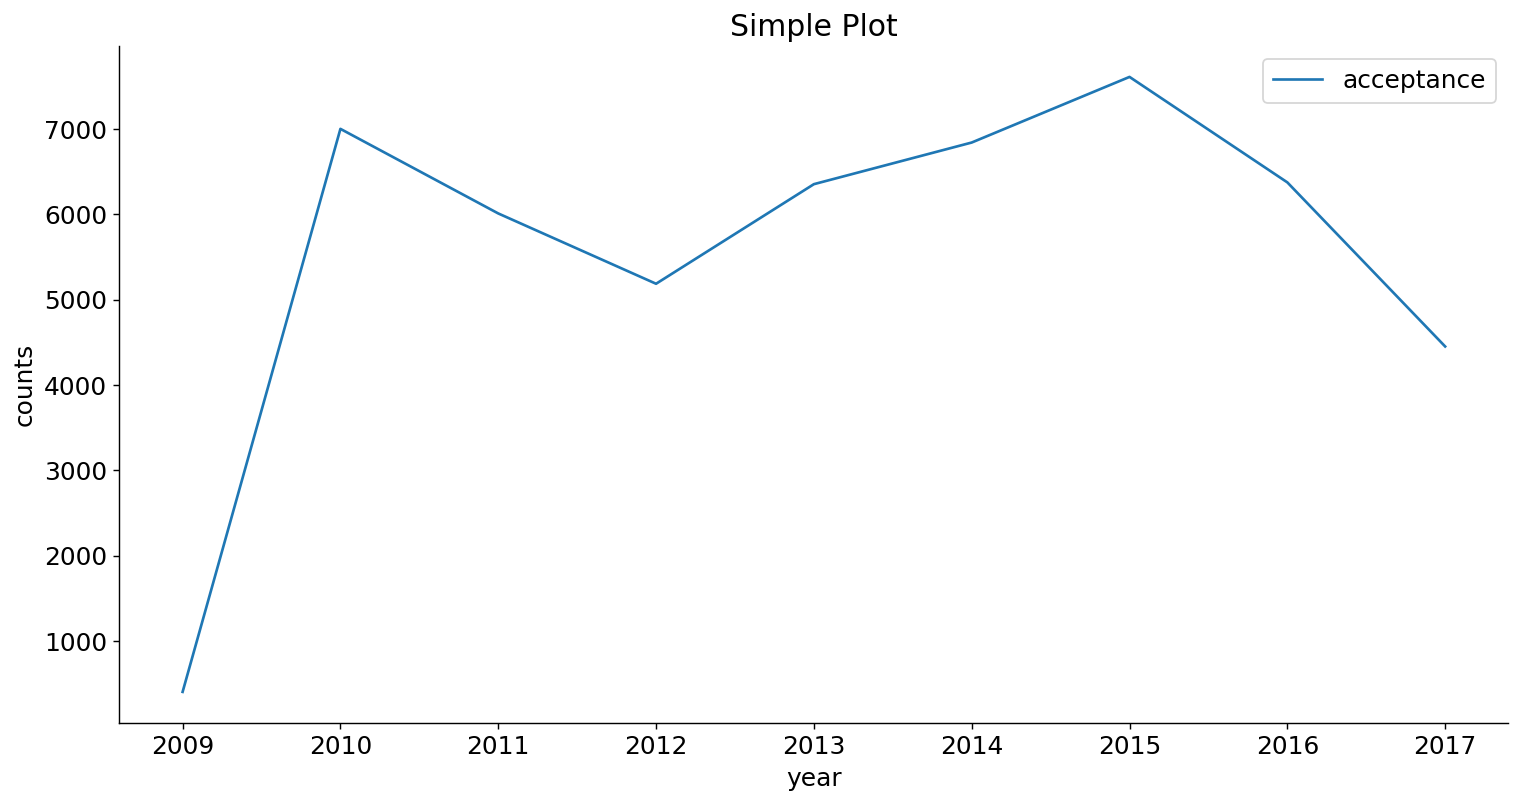

In [29]:
fig = plt.figure()
plt.plot(hist["year"], hist["counts"], label='acceptance')
plt.xlabel('year')
plt.ylabel('counts')
plt.title("Simple Plot")
plt.legend()
plt.show()

In [30]:
data_frame = df.drop('year', axis = 1) 
data_frame.to_csv("2009-2017_small.csv",index=False)

In [31]:
# df.to_csv("2014-2017.csv",index=False)

In [32]:
data_frame.corr()

,month,day,hour,weekday
month,1.000000,0.013071,-0.001553,0.001411
day,0.013071,1.000000,-0.002462,0.005974
hour,-0.001553,-0.002462,1.000000,-0.017997
weekday,0.001411,0.005974,-0.017997,1.000000


Because marketing code is variable that has changed in so many years, so it has much less impact on the result compare to other features